<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E5%AF%86%E5%BA%A6%E8%81%9A%E7%B1%BB(DBSCAN)%E7%AE%97%E6%B3%95%E6%A1%88%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用scikit的相关API创建模拟数据，然后使用DBSCAN密度聚类算法进行数据聚类操作，并比较DBSCAN算法在不同参数情况下的密度聚类效果
DBSCAN是一个比较有代表性的基于密度的聚类算法，相比于基于划分的聚类方法和层次聚类方法，DBSCAN算法将簇定义为密度相连的点的最大集合，能够将足够高密度的区域划分为簇，并且在具有噪声的空间数据商能够发现任意形状的簇
DBSCAN算法的核心思想是：用一个点的ε邻域内的邻居点数衡量该点所在空间的密度，该算法可以找出形状不规则的cluster，而且聚类的时候事先不需要给定cluster的数量

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
#创建模拟数据
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data1, y1 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,0.75, 0.5,0.25), random_state=0)
data1 = StandardScaler().fit_transform(data1)
params1 = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

t = np.arange(0, 2 * np.pi, 0.1)
data2_1 = np.vstack((np.cos(t), np.sin(t))).T
data2_2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data2_3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data2 = np.vstack((data2_1, data2_2, data2_3))
y2 = np.vstack(([0] * len(data2_1), [1] * len(data2_2), [2] * len(data2_3)))
params2 = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))

datasets = [(data1, y1,params1), (data2, y2,params2)]

In [4]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2] ；聚类簇数目: 3
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], 

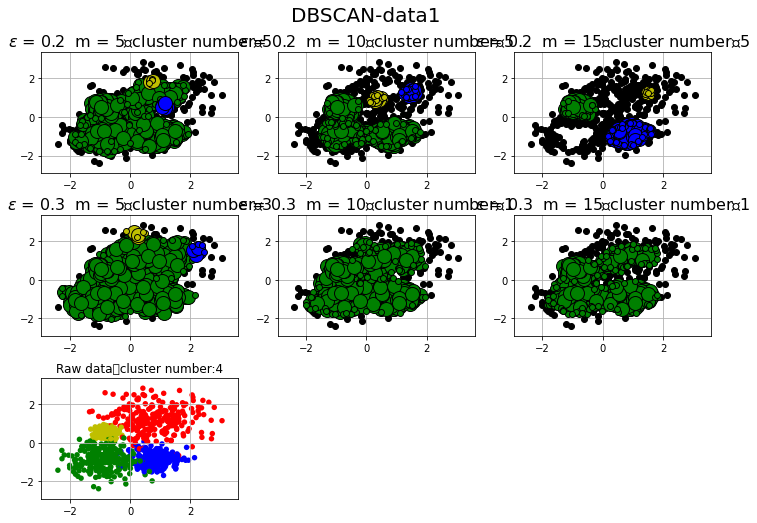

Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.


类别: [0 1 2] ；聚类簇数目: 3
类别: [-1  0  1] ；聚类簇数目: 2
类别: [-1  0] ；聚类簇数目: 1
类别: [0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/b

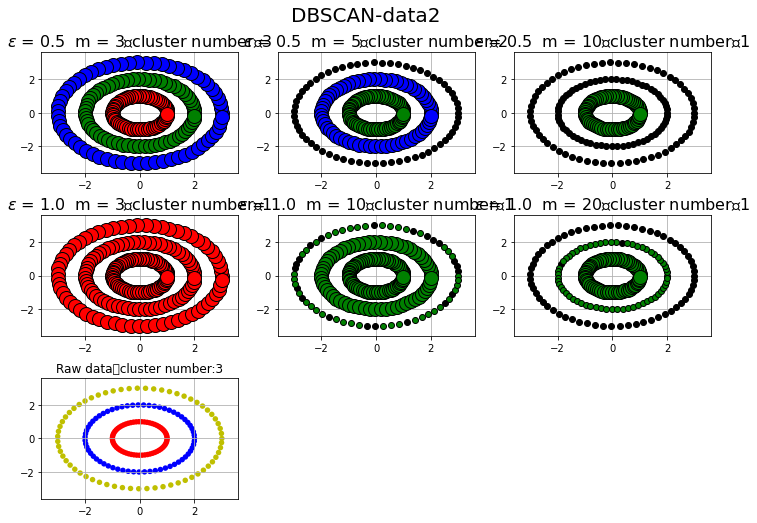

In [5]:
colors = ['r', 'g', 'b', 'y']
cm = mpl.colors.ListedColormap(colors)

for i,(X, y, params) in enumerate(datasets):
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1_min, x1_max = expandBorder(x1_min, x1_max)
    x2_min, x2_max = expandBorder(x2_min, x2_max)
    
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'DBSCAN-data%d' % (i+1), fontsize=20)
    plt.subplots_adjust(top=0.9,hspace=0.35)
    
    for j,param in enumerate(params):
        eps, min_samples = param
        model = DBSCAN(eps=eps, min_samples=min_samples)
        # eps 半径，邻域制的大小，值越大，越能容忍噪声点，相比下越小形成的簇就越多
        # min_samples 原理中的M,用来控制哪个是核心点，值越小，越可以容忍噪声点，越大，越容易吧有效点划分为噪声点
        model.fit(X)
        y_hat = model.labels_

        unique_y_hat = np.unique(y_hat)
        n_clusters = len(unique_y_hat) - (1 if -1 in y_hat else 0)
        print ("类别:",unique_y_hat,"；聚类簇数目:",n_clusters)
        
        
        core_samples_mask = np.zeros_like(y_hat, dtype=bool)
        core_samples_mask[model.core_sample_indices_] = True
        
        ## 开始画图
        plt.subplot(3,3,j+1)
        for k, col in zip(unique_y_hat, colors):
            if k == -1:
                col = 'k'
                
            class_member_mask = (y_hat == k)
            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title('$\epsilon$ = %.1f  m = %d，cluster number：%d' % (eps, min_samples, n_clusters), fontsize=16)
    ## 原始数据显示
    plt.subplot(3,3,7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title('Raw data，cluster number:%d' % len(np.unique(y)))
    plt.grid(True)
    plt.show()   

In [10]:
# 谱聚类
from sklearn.cluster import spectral_clustering # 普聚类
from sklearn.metrics import euclidean_distances

In [11]:
### 创建模拟数据
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
#符合高斯分布的数据集
data1, y1 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(0.75,0.5,0.3,0.25), random_state=0)
data1 = StandardScaler().fit_transform(data1)
dist1 = euclidean_distances(data1, squared=True)
affinity_params1 = map(lambda x: (x,np.exp(-dist1 ** 2 / (x ** 2)) + 1e-6), np.logspace(-2,0,6))

# 数据2
#圆形数据集
t = np.arange(0, 2 * np.pi, 0.1)
data2_1 = np.vstack((np.cos(t), np.sin(t))).T
data2_2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data2_3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data2 = np.vstack((data2_1, data2_2, data2_3))
y2 = np.vstack(([0] * len(data2_1), [1] * len(data2_2), [2] * len(data2_3)))
## 数据2的参数
dist2 = euclidean_distances(data2, squared=True)
affinity_params2 = map(lambda x: (x, np.exp(-dist2 ** 2 / (x ** 2)) + 1e-6), np.logspace(-2,0,6))

datasets = [(data1, y1, affinity_params1), (data2, y2, affinity_params2)]

类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4


Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c07' [U+7c07], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u76ee' [U+76ee], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c07' [U+7c07], 

类别: [0 1 2 3] ；聚类簇数目: 4


Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c07' [U+7c07], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u76ee' [U+76ee], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c07' [U+7c07], 

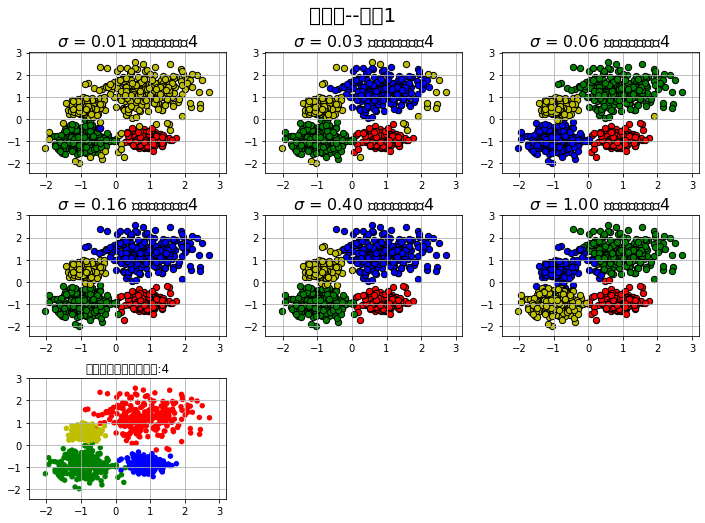

类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3


Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c07' [U+7c07], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u76ee' [U+76ee], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.


类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3


Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c07' [U+7c07], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u76ee' [U+76ee], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff1a' [U+ff1a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u805a' [U+805a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c7b' [U+7c7b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7c07' [U+7c07], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u76ee' [U+76ee], 

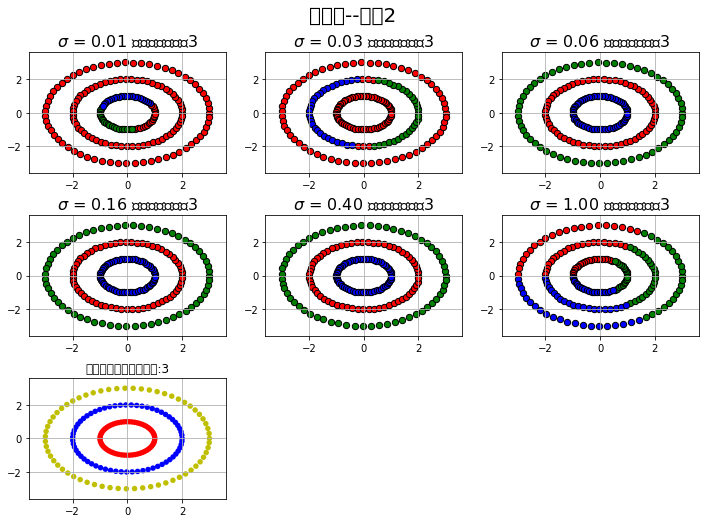

In [12]:
colors = ['r', 'g', 'b', 'y']
cm = mpl.colors.ListedColormap(colors)

for i,(X, y, params) in enumerate(datasets):
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1_min, x1_max = expandBorder(x1_min, x1_max)
    x2_min, x2_max = expandBorder(x2_min, x2_max)
    n_clusters = len(np.unique(y))
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'谱聚类--数据%d' % (i+1), fontsize=20)
    plt.subplots_adjust(top=0.9,hspace=0.35)
    
    for j,param in enumerate(params):
        sigma,af = param
        # 谱聚类的建模
        y_hat = spectral_clustering(af, n_clusters=n_clusters, assign_labels='kmeans', random_state=28)
        unique_y_hat = np.unique(y_hat)
        n_clusters = len(unique_y_hat) - (1 if -1 in y_hat else 0)
        print ("类别:",unique_y_hat,"；聚类簇数目:",n_clusters)
        
        ## 开始画图
        plt.subplot(3,3,j+1)
        for k, col in zip(unique_y_hat, colors):
            cur = (y_hat == k)
            plt.scatter(X[cur, 0], X[cur, 1], s=40, c=col, edgecolors='k')
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title('$\sigma$ = %.2f ，聚类簇数目：%d' % (sigma, n_clusters), fontsize=16)

    plt.subplot(3,3,7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title('原始数据，聚类簇数目:%d' % len(np.unique(y)))
    plt.grid(True)
    plt.show()  